In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("homeprices_banglore.csv")
df.sample(5)

,area,bedroom,price
13,1170,2,196.0
1,2600,4,120.0
15,1121,3,85.0
17,1270,3,85.0
5,1170,2,38.0


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('price', axis='columns')
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_test

In [3]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# scaler = MinMaxScaler()
# obj = scaler.fit(X_train, y_train)
sx = preprocessing.MinMaxScaler() #[0,1] mij.-um scale a anum exac arjeqnery
sy = preprocessing.MinMaxScaler()
# scaled_X = scaler.transform(df.drop('price', axis='columns'))
scaled_X = sx.fit_transform(df.drop('price', axis='columns'))
scaled_X #scaled_X.shape[0] - toxeri qanaky, scaled_X.shape[1] - syuneri qanaky


array([[0.25867195, 0.        ],
       [0.76874794, 1.        ],
       [0.38553023, 0.5       ],
       [0.4122894 , 0.5       ],
       [0.30624381, 0.        ],
       [0.296333  , 0.        ],
       [0.81235547, 1.        ],
       [1.        , 0.5       ],
       [0.50445986, 0.        ],
       [0.296333  , 0.        ],
       [0.81235547, 1.        ],
       [0.4122894 , 0.5       ],
       [0.30624381, 0.        ],
       [0.296333  , 0.        ],
       [0.81235547, 1.        ],
       [0.28014536, 0.5       ],
       [0.24017179, 0.        ],
       [0.32936901, 0.5       ],
       [0.        , 0.        ]])

In [4]:
# scaler.fit(df['price'].values.reshape(df.shape[0],1))
# scaled_y = scaler.transform(df['price'].values.reshape(df.shape[0],1))
scaled_y = sy.fit_transform(df['price'].values.reshape(df.shape[0],1))
scaled_y

array([[0.00259709],
       [0.19902913],
       [0.05825243],
       [0.08980583],
       [0.0315534 ],
       [0.        ],
       [0.28398058],
       [0.08980583],
       [0.0315534 ],
       [1.        ],
       [0.15048544],
       [0.04126214],
       [0.34466019],
       [0.38349515],
       [0.15048544],
       [0.11407767],
       [0.11407767],
       [0.11407767],
       [0.12864078]])

In [5]:
def batch_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_featues = X.shape[1]
    
    w= np.ones(shape=(number_of_featues))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        y_predicted = np.dot(w, scaled_X.T) + b
        
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(y_true-y_predicted)) #error1...errorn
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list


w,b,cost,cost_list,epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w,b,cost
        

(array([0.37120344, 0.00666773]), -0.016782064406763154, 0.061343917501825246)

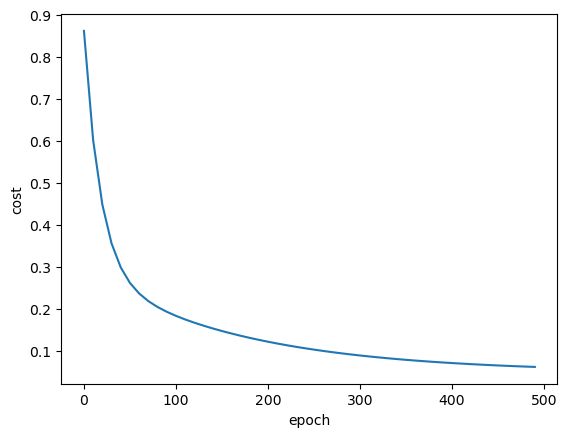

In [6]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

In [7]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area,bedrooms]])
    
    scaled_price = w[0]*scaled_X[0][0] + w[1]*scaled_X[0][1] + b
    return sy.inverse_transform([[scaled_price]])[0][0]

predict(1056,2,w,b)

C:\Users\User\anaconda3\envs\newenvt\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


70.64599558962826

In [14]:
import random
random.randint(0,6)

4

In [22]:
def stochastic_gradient_descent(X, y_true, epochs, learning_rate=0.01):
    
    number_of_featues = X.shape[1]
    
    w= np.ones(shape=(number_of_featues))
    b = 0
    total_samples = X.shape[0]
    
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = random.randint(0, total_samples - 1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]
        y_predicted = np.dot(w, sample_x.T) + b
        
        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_predicted))
        b_grad = -(2/total_samples)*np.sum(sample_y-y_predicted)
        
        w = w-learning_rate*w_grad
        b = b-learning_rate*b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted)) #error1...errorn
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w,b,cost,cost_list,epoch_list

w_sgd, b_sgd, cost_sgd, cost_list_sgd,epoch_list_sgd = stochastic_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)
w_sgd, b_sgd, cost_sgd

(array([ 0.36427483, -0.01315234]), -0.006276354122534243, 0.00482139086513022)

In [23]:
w, b, cost

(array([0.37120344, 0.00666773]), -0.016782064406763154, 0.061343917501825246)

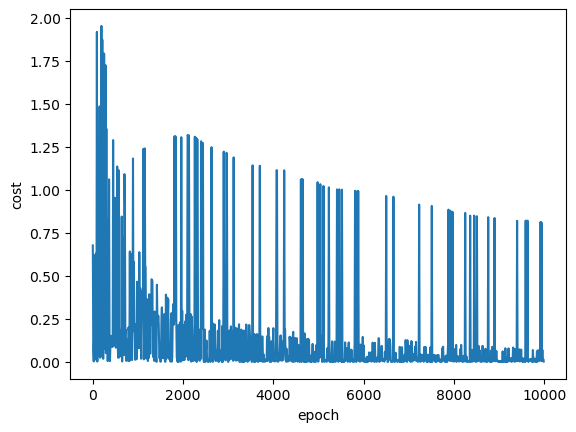

In [24]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list_sgd,cost_list_sgd)

In [25]:
predict(1056,2,w_sgd, b_sgd)

C:\Users\User\anaconda3\envs\newenvt\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


74.23594674129559